In [1]:
#!pip3 install seaborn
!pip3 install sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

You should consider upgrading via the '/Users/macbook/.pyenv/versions/3.9.0/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
from sklearn.model_selection import train_test_split

data = data.drop(columns=['Id']).dropna(axis=1)

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

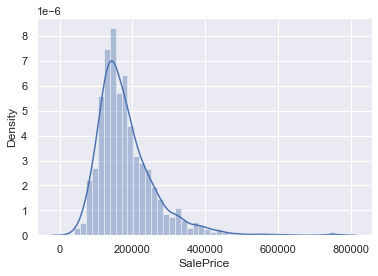

In [6]:
sns.distplot(y_train)

In [7]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) на числовых признаках из нашего датасета
# TO DO

from sklearn.linear_model import LinearRegression, Ridge, Lasso

num_features = X.select_dtypes(include=np.number).columns.tolist()

print(num_features)
model = LinearRegression()
model.fit(X[num_features], y)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


LinearRegression()

$$\text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (y_i - a(x_i))^2}$$

In [8]:
# Определите RMSE через функцию sklearn.metrics.make_scorer
# TO DO
from sklearn.metrics import make_scorer, mean_squared_error
print("RMSE:", np.sqrt(mean_squared_error(y, model.predict(X[num_features]))))

RMSE_scorer = make_scorer(mean_squared_error, squared=False, greater_is_better=False)

print("RMSE:", RMSE_scorer(model, X[num_features], y))

RMSE: 34715.96862856209
RMSE: -34715.96862856209


In [9]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

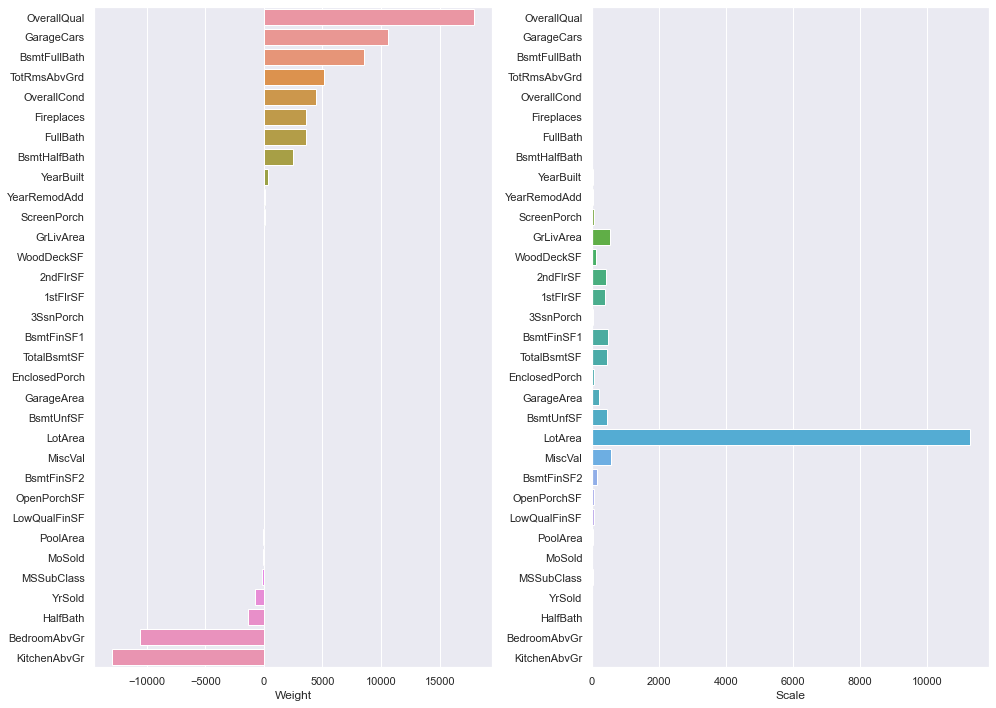

In [10]:
show_weights(num_features, model.coef_, X_train[num_features].std())

In [11]:
# Отмасштабируйте признаки перед обучением модели, воспользуясь трансформером StandardScaler
# TO DO

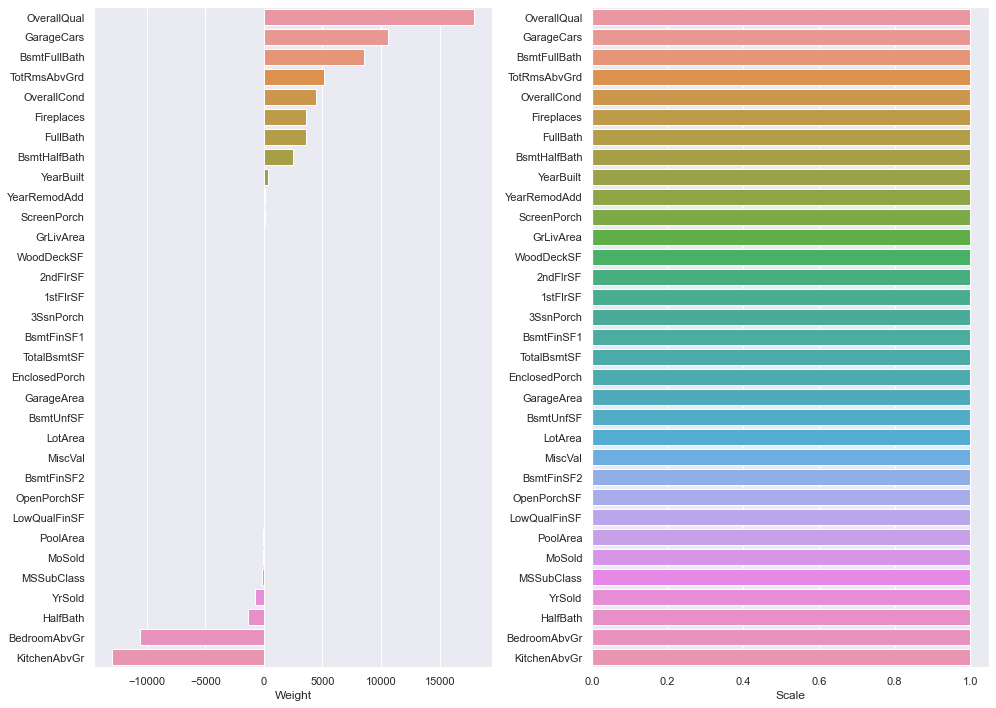

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_features])
X_train_scaled = X_train
X_train_scaled[num_features] = scaler.transform(X_train[num_features])
scales = pd.Series(data=X_train_scaled.std(axis=0), index=num_features)
show_weights(num_features, model.coef_, scales)

In [13]:
# Подберите коэффициент регуляризации alpha, воспользуясь GridSearchCV
# TO DO

from sklearn.model_selection import GridSearchCV

gbr_grid_search = GridSearchCV(Ridge(random_state=6),
                               [{'alpha': np.linspace(0, 1000, 1100)}], 
                               cv=5,
                               scoring=RMSE_scorer,
                               verbose=10)
gbr_grid_search.fit(X_train[num_features], y_train)

Fitting 5 folds for each of 1100 candidates, totalling 5500 fits
[CV 1/5; 1/1100] START alpha=0.0................................................
[CV 1/5; 1/1100] END ............alpha=0.0;, score=-43836.128 total time=   0.0s
[CV 2/5; 1/1100] START alpha=0.0................................................
[CV 2/5; 1/1100] END ............alpha=0.0;, score=-32743.094 total time=   0.0s
[CV 3/5; 1/1100] START alpha=0.0................................................
[CV 3/5; 1/1100] END ............alpha=0.0;, score=-53549.731 total time=   0.0s
[CV 4/5; 1/1100] START alpha=0.0................................................
[CV 4/5; 1/1100] END ............alpha=0.0;, score=-47950.340 total time=   0.0s
[CV 5/5; 1/1100] START alpha=0.0................................................
[CV 5/5; 1/1100] END ............alpha=0.0;, score=-27864.953 total time=   0.0s
[CV 1/5; 2/1100] START alpha=0.9099181073703366.................................
[CV 1/5; 2/1100] END alpha=0.909918107370336

GridSearchCV(cv=5, estimator=Ridge(random_state=6),
             param_grid=[{'alpha': array([0.00000000e+00, 9.09918107e-01, 1.81983621e+00, ...,
       9.98180164e+02, 9.99090082e+02, 1.00000000e+03])}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
             verbose=10)

In [14]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) с подобранным коэффициентом регуляризации на числовых признаках из нашего датасета, воспользуясь классом Pipeline (не забывать про мастабирование признаков через StandardScaler)
# TO DO

Linear_model = LinearRegression()
Lasso_model = Lasso(alpha=gbr_grid_search.best_params_['alpha'], random_state=6)
Ridge_model = Ridge(alpha=gbr_grid_search.best_params_['alpha'], random_state=6)

Linear_model.fit(X_train[num_features], y_train)
Lasso_model.fit(X_train[num_features], y_train)
Ridge_model.fit(X_train[num_features], y_train)

print(f'Linear RMSE : {RMSE_scorer(Linear_model, X_test[num_features], y_test)}')
print(f'Lasso RMSE : {RMSE_scorer(Lasso_model, X_test[num_features], y_test)}')
print(f'Ridge RMSE : {RMSE_scorer(Ridge_model, X_test[num_features], y_test)}')

Linear RMSE : -4.102538446758163e+19
Lasso RMSE : -115417293.90629244
Ridge RMSE : -100799906.0672673


In [15]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [16]:
X_train[categorical].sample(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
1439,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,CBlock,GasA,TA,Y,TA,Typ,Y,WD,Normal
243,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,...,TA,CBlock,GasA,TA,Y,TA,Typ,Y,WD,Normal
386,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Edwards,Feedr,Norm,...,Fa,PConc,GasA,TA,Y,TA,Typ,N,WD,AdjLand
1199,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,TA,CBlock,GasA,Gd,Y,TA,Typ,Y,WD,Normal
713,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Norm,...,TA,CBlock,GasW,TA,N,TA,Typ,Y,WD,Normal


In [17]:
# Закодируйте категориальные признаки числами с помощью OneHotEncoder и обучите модели на всех признаках
from sklearn.preprocessing import OneHotEncoder
column_transformer = OneHotEncoder()
column_transformer.fit(X_train[categorical])

OneHotEncoder()

In [18]:
print("Size before OneHot:", X_train[categorical].shape)
print("Size after OneHot:", column_transformer.transform(X_train[categorical]).shape)

Size before OneHot: (1022, 27)
Size after OneHot: (1022, 175)


In [19]:
# Обучите линейную регрессию с l1 и l2 регуляризаторами

X_train = X_train.join(pd.get_dummies(X_train[categorical])).drop(columns=categorical) 
X_test = X_test.join(pd.get_dummies(X_test[categorical])).drop(columns=categorical) 
model1 = Lasso(random_state=6)
model2 = Ridge(random_state=6)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

Ridge(random_state=6)

In [20]:
ridge_zeros = np.sum(model2.coef_ == 0)
lasso_zeros = np.sum(model1.coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Ridge: 0
Zero weights in Lasso: 14


In [21]:
# Подберите коэффициент регуляризации для всех моделей, воспользуясь GridSearchCV
# TO DO

In [22]:

gbr_grid_search_ridge = GridSearchCV(Ridge(random_state=6),
                               [{'alpha': np.linspace(0, 1000, 1100)}], 
                               cv=5,
                               scoring=RMSE_scorer,
                               verbose=10)
gbr_grid_search_ridge.fit(X_train[num_features], y_train)

Fitting 5 folds for each of 1100 candidates, totalling 5500 fits
[CV 1/5; 1/1100] START alpha=0.0................................................
[CV 1/5; 1/1100] END ............alpha=0.0;, score=-43836.128 total time=   0.0s
[CV 2/5; 1/1100] START alpha=0.0................................................
[CV 2/5; 1/1100] END ............alpha=0.0;, score=-32743.094 total time=   0.0s
[CV 3/5; 1/1100] START alpha=0.0................................................
[CV 3/5; 1/1100] END ............alpha=0.0;, score=-53549.731 total time=   0.0s
[CV 4/5; 1/1100] START alpha=0.0................................................
[CV 4/5; 1/1100] END ............alpha=0.0;, score=-47950.340 total time=   0.0s
[CV 5/5; 1/1100] START alpha=0.0................................................
[CV 5/5; 1/1100] END ............alpha=0.0;, score=-27864.953 total time=   0.0s
[CV 1/5; 2/1100] START alpha=0.9099181073703366.................................
[CV 1/5; 2/1100] END alpha=0.909918107370336

GridSearchCV(cv=5, estimator=Ridge(random_state=6),
             param_grid=[{'alpha': array([0.00000000e+00, 9.09918107e-01, 1.81983621e+00, ...,
       9.98180164e+02, 9.99090082e+02, 1.00000000e+03])}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
             verbose=10)

In [23]:
print(gbr_grid_search_ridge.best_params_)
print(gbr_grid_search_ridge.best_score_)
print(gbr_grid_search_ridge.best_estimator_)

{'alpha': 289.35395814376704}
-40368.292937041595
Ridge(alpha=289.35395814376704, random_state=6)


In [24]:
gbr_grid_search_lasso = GridSearchCV(Lasso(random_state=6),
                               [{'alpha': np.linspace(0, 1000, 1100)}],
                               scoring=RMSE_scorer,
                               verbose=10)
gbr_grid_search_lasso.fit(X_train[num_features], y_train)

Fitting 5 folds for each of 1100 candidates, totalling 5500 fits
[CV 1/5; 1/1100] START alpha=0.0................................................
[CV 1/5; 1/1100] END ............alpha=0.0;, score=-44269.408 total time=   0.0s
[CV 2/5; 1/1100] START alpha=0.0................................................
[CV 2/5; 1/1100] END ............alpha=0.0;, score=-32171.012 total time=   0.0s
[CV 3/5; 1/1100] START alpha=0.0................................................
[CV 3/5; 1/1100] END ............alpha=0.0;, score=-54023.574 total time=   0.0s
[CV 4/5; 1/1100] START alpha=0.0................................................
[CV 4/5; 1/1100] END ............alpha=0.0;, score=-48760.660 total time=   0.0s
[CV 5/5; 1/1100] START alpha=0.0................................................
[CV 5/5; 1/1100] END ............alpha=0.0;, score=-27985.144 total time=   0.0s
[CV 1/5; 2/1100] START alpha=0.9099181073703366.................................
[CV 1/5; 2/1100] END alpha=0.909918107370336

GridSearchCV(estimator=Lasso(random_state=6),
             param_grid=[{'alpha': array([0.00000000e+00, 9.09918107e-01, 1.81983621e+00, ...,
       9.98180164e+02, 9.99090082e+02, 1.00000000e+03])}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
             verbose=10)

In [25]:
print(gbr_grid_search_lasso.best_params_)
print(gbr_grid_search_lasso.best_score_)
print(gbr_grid_search_lasso.best_estimator_)

{'alpha': 1000.0}
-40669.07590064621
Lasso(alpha=1000.0, random_state=6)


In [26]:
model1 = Lasso(alpha=gbr_grid_search_lasso.best_params_['alpha'], random_state=6)
model2 = Ridge(alpha=gbr_grid_search_ridge.best_params_['alpha'], random_state=6)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

Ridge(alpha=289.35395814376704, random_state=6)

2661003662.943177

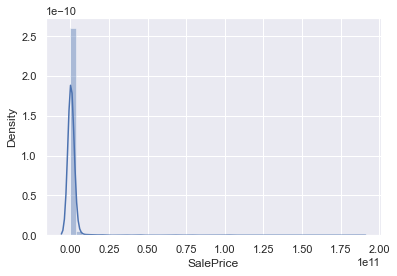

In [27]:
error1 = (y_train - model1.predict(X_train)) ** 2
sns.distplot(error1)
error1.quantile(0.95)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

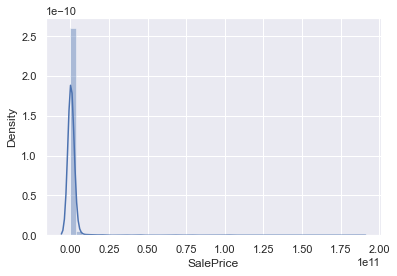

In [28]:
error2 = (y_train - model2.predict(X_train)) ** 2
sns.distplot(error1)

Как видно из гистограммы, есть примеры с очень большими остатками. Попробуем их выбросить из обучающей выборки. Например, выбросим примеры, остаток у которых больше 0.95-квантили.

In [29]:
# Выбросите из обучающей выборки примеры, остаток у которых больше 0.95-квантили и переобучите модели 
# TO DO

mask = error1 < error1.quantile(0.95)

model1 = Lasso(alpha=gbr_grid_search_lasso.best_params_['alpha'], random_state=6)
model2 = Ridge(alpha=gbr_grid_search_ridge.best_params_['alpha'], random_state=6)

model1.fit(X_train[mask], y_train[mask])
model2.fit(X_train[mask], y_train[mask])

Ridge(alpha=289.35395814376704, random_state=6)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

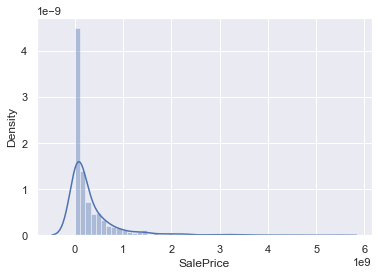

In [32]:
error1 = (y_train[mask] - model1.predict(X_train[mask])) ** 2
sns.distplot(error1)

In [33]:
# Получите скор по нашей метрике (RMSE) ниже значения 30000
# TO DO

print({np.abs(RMSE_scorer(model1, X_train[mask], y_train[mask]))})

{18795.228785031493}
